In [4]:
import numpy as np
import bjpmodel.dummy_bjp as dummy
from bjpmodel.model import BayesianModel
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def run_test(seed, lcensor, rcensor, test_name):
    np.random.seed(seed)
    print(lcensor, rcensor)

    num_vars = 2
    num_data_samples = 1000
    mean = np.array([0.5, -0.2])
    cov = np.array([[2.0, 0.3], [0.3, 0.5]])

    mvn_data = np.random.multivariate_normal(mean, cov, size=num_data_samples).T
    mvn_data = np.array(mvn_data, copy=True, order='C')

    mvn_data = np.clip(mvn_data, lcensor[:, None], rcensor[:, None])

    bjp = BayesianModel(num_vars, burn=1000, chainlength=5000, seed='fixed', trans_optimiser='SCE')

    bjp_fitting_data = bjp.sample(mvn_data, ['yjt', 'yjt'], lcensor, rcensor)

    predictor = np.array([-9999, -9999])

    predictions_result = bjp.forecast(predictor, gen_climatology=False)
    predictions = predictions_result['forecast']

    print(f"--- {test_name} ---")
    print("Mean Data:", mvn_data.mean(axis=1), "Std Data:", mvn_data.std(axis=1))
    print("Mean Predictions:", predictions.mean(axis=0), "Std Predictions:", predictions.std(axis=0))

    # Plotting
    fig, axs = plt.subplots(1, 4, figsize=(12, 5))

    # Original data distribution
    axs[0].hist(mvn_data[0], bins=30, alpha=0.6, label='Variable 1')
    axs[0].hist(mvn_data[1], bins=30, alpha=0.6, label='Variable 2')
    axs[0].set_title('Clipped Multivariate Normal Data')
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Forecasted predictions distribution
    axs[1].hist(predictions[:, 0], bins=30, alpha=0.6, label='Prediction 1')
    axs[1].hist(predictions[:, 1], bins=30, alpha=0.6, label='Prediction 2')
    axs[1].set_title('Forecasted Predictions')
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    axs[2].set_title('Hexbin Prediction')
    axs[2].hexbin(predictions[:, 0], predictions[:, 1], gridsize=30, cmap=plt.cm.BuGn)

    axs[3].set_title('Hexbin Observations')
    axs[3].hexbin(mvn_data[0], mvn_data[1], gridsize=30, cmap=plt.cm.BuGn)

    plt.tight_layout()
    plt.show()


[-1.30846209 -1.1149359 ] [2.31631585 0.69101736]
--- Left and right censoring ---
Mean Data: [ 0.48266767 -0.19992095] Std Data: [1.17708839 0.57420349]
Mean Predictions: [ 0.46402169 -0.20454348] Std Predictions: [1.17634781 0.56562773]


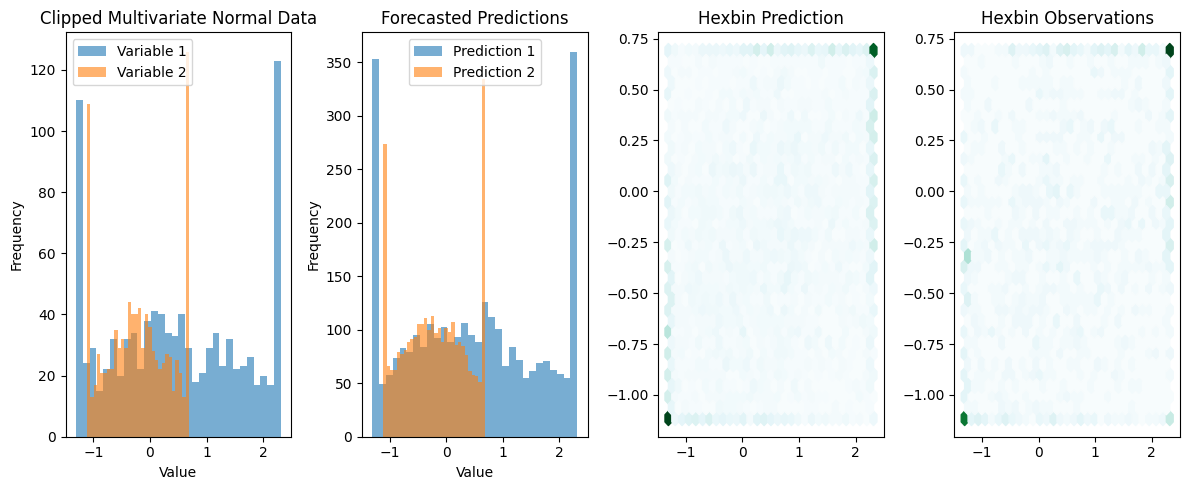

In [30]:
seed = 5
np.random.seed(seed)
mean = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])
data = np.random.multivariate_normal(mean, cov, size=10000).T
lcensor = np.percentile(data, 10, axis=1)
rcensor = np.percentile(data, 90, axis=1)

run_test(seed, lcensor, rcensor, "Left and right censoring")